In [44]:
import numpy as np
import cvxpy as cvx
import math
import matplotlib.pyplot as plt
import pandas as pd

17_2(a)

In [45]:
p = np.array([0.12, 0.1, 0.07, 0.03])
Sigma = np.matrix([[0.0064, 0.0008, -0.0011, 0],[0.0008, 0.0025, 0, 0],[-0.0011, 0, 0.0004, 0],[0, 0, 0, 0]])
mu = 1
px = np.array([])
st_dev = np.array([])
X = np.array([])

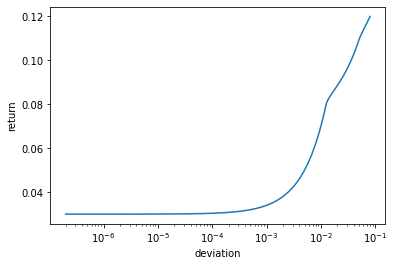

In [46]:
for mu in np.logspace(0, 7, 100, endpoint = True):
  x = cvx.Variable(4)
  problem = cvx.Problem(cvx.Minimize(-p.T @ x + mu * cvx.quad_form(x, Sigma)), [x >= 0, np.ones(4).T @ x == 1])
  problem.solve()
  px = np.append(px, p.T @ x.value)
  X = np.append(X, x.value)
  st_dev = np.append(st_dev, math.sqrt(x.value.T @ Sigma @ x.value))

plt.plot(st_dev, px)
plt.xscale('log')
plt.ylabel('return')
plt.xlabel('deviation')
X[X < 0] = 0

Text(0.5, 0, 'standard deviation')

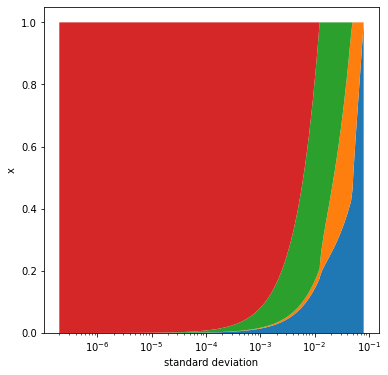

In [47]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(6)
    
ax = fig.add_subplot(1, 1, 1)

ax.stackplot(st_dev, X[0::4], X[1::4], X[2::4], X[3::4], labels=['x1','x2','x3','x4'])
ax.set_xscale('log')
ax.set_ylabel('x')
ax.set_xlabel('standard deviation')

17_2(b)

Text(0.5, 0, 'deviation')

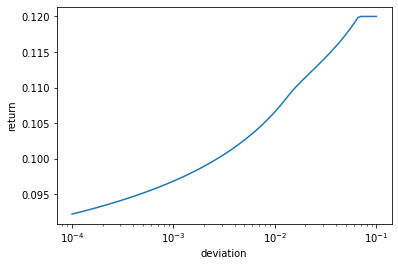

In [48]:
from scipy.stats import norm
from scipy.linalg import sqrtm

eta = 0.001
x = cvx.Variable(4)
px = np.array([])
st_dev = np.array([])
X = np.array([])

for eta in np.logspace(-4, -1, 100):
  theta = norm.ppf(eta)
  constraints = [p.T @ x + theta * cvx.norm(sqrtm(Sigma) @ x, 2) >= 0, cvx.sum(x) == 1, x >= 0]
  problem = cvx.Problem(cvx.Minimize(- p.T @ x), constraints)
  problem.solve()
  px = np.append(px, p.T @ x.value)
  X = np.append(X, x.value)
  st_dev = np.append(st_dev, math.sqrt(x.value.T @ Sigma @ x.value))


plt.plot(np.logspace(-4, -1, 100), px)
plt.xscale('log')
plt.ylabel('return')
plt.xlabel('deviation')

Text(0.5, 0, 'standard deviation')

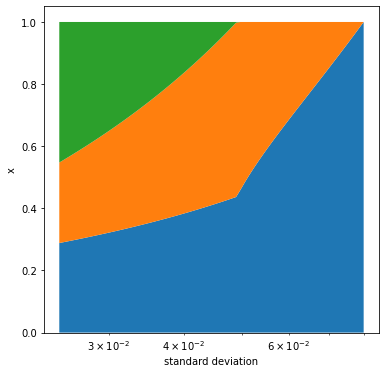

In [49]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(6)
    
ax = fig.add_subplot(1, 1, 1)

ax.stackplot(st_dev, X[0::4], X[1::4], X[2::4], X[3::4], labels=['x1','x2','x3','x4'])
ax.set_xscale('log')
ax.set_ylabel('x')
ax.set_xlabel('standard deviation')

17_2(c)

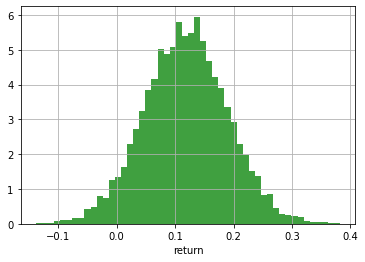

доля отрицательных доходностей 0.0495
эмпирическое среднее 0.11843429383546539


In [50]:
eta = 0.05
x = cvx.Variable(4)

theta = norm.ppf(eta)
constraints = [p.T @ x + theta * cvx.norm(sqrtm(Sigma) @ x, 2) >= 0, cvx.sum(x) == 1, x >= 0]
prob = cvx.Problem(cvx.Minimize(- p.T @ x), constraints)
prob.solve()
n = 10000
rsample = np.empty(n)
bad = 0
empr = 0

for i in range(n):
  rsample[i] = (p + (sqrtm(Sigma) @ np.random.randn(4,1)).T) @ x.value
  empr = empr + rsample[i]
  if (rsample[i] <= 0):
    bad = bad + 1

plt.hist(rsample, 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('return')
plt.grid(True)
plt.show()

print('доля отрицательных доходностей', bad/n)
print('эмпирическое среднее', empr/n)